## **Churn Prediction**

### **Introduction**

Link: [Telco Database](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [ ]:
#Import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Exploratory Analysis**

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan ).astype(float)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
 #Check if there are some missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


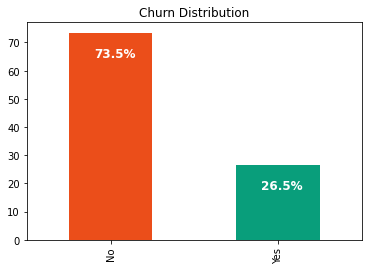

In [ ]:
colors = ['#EB4E1A','#099E7B']
churn_chart = (df['Churn'].value_counts()*100/len(df)).plot(kind='bar', color=colors)
churn_chart.set_title('Churn Distribution')

totals_churn = []

for i in churn_chart.patches:
    totals_churn.append(i.get_width())

total_churn = sum(totals_churn)

for i in churn_chart.patches:
    churn_chart.text(i.get_x()+0.15, i.get_height()-8.5,
                     str(round((i.get_height()/total_churn),1))+'%',
                     fontsize=12,
                     color='white',
                     weight='bold')


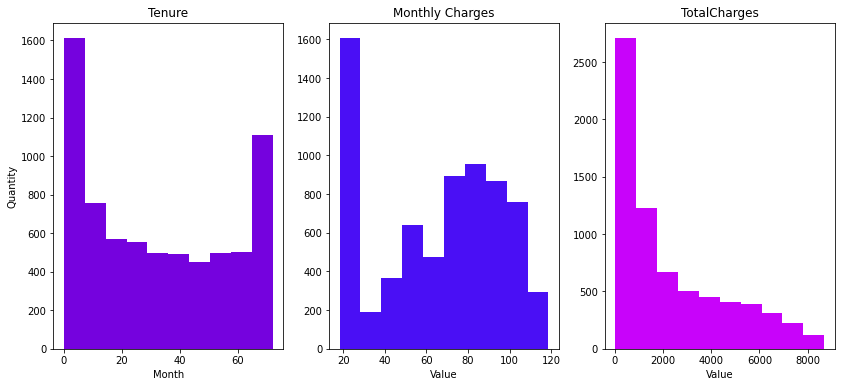

In [ ]:
fig, ax = plt.subplots(figsize=(14,6),ncols=3)

ax[0].hist(data=df,x='tenure', bins=10, color='#7502DE')
ax[0].set_title('Tenure', size=12)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Quantity')

ax[1].hist(data=df, x='MonthlyCharges',bins=10, color='#4A0FF5')
ax[1].set_title('Monthly Charges', size=12)
ax[1].set_xlabel('Value')

ax[2].hist(data=df, x='TotalCharges', bins=10, color='#C803FA')
ax[2].set_title('TotalCharges',size=12)
ax[2].set_xlabel('Value')

plt.show()

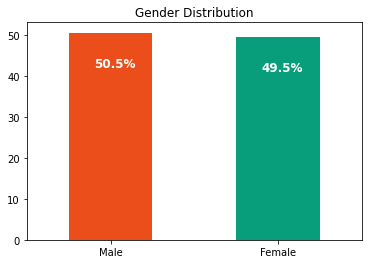

In [ ]:
colors = ['#EB4E1A','#099E7B']
gender_chart = (df['gender'].value_counts()*100/len(df)).plot(kind='bar', color=colors, stacked=True, rot=0)
gender_chart.set_title('Gender Distribution')

totals =[]
for i in gender_chart.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in gender_chart.patches:
  gender_chart.text(i.get_x()+.15, i.get_height()-8.5, 
          str(round((i.get_height()/total), 1))+'%', 
          fontsize=12, 
          color='white', 
          weight='bold')

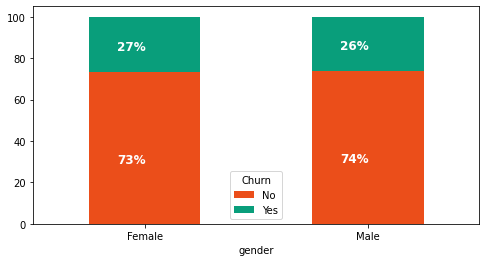

In [ ]:
colors = ['#EB4E1A','#099E7B']
churn_contract = df.groupby(['gender','Churn']).size().unstack()
contract_chart = (churn_contract.T*100/churn_contract.T.sum()).T.plot(
    kind='bar',
    color=colors,
    stacked=True,
    figsize=(8,4),
    rot=0
)

contract_totals = []
for i in contract_chart.patches:
    width, height = i.get_width(), i.get_height()
    x,y = i.get_xy()
    contract_chart.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+0.4*height),
                            color='white',
                            size=12,
                            weight='bold')

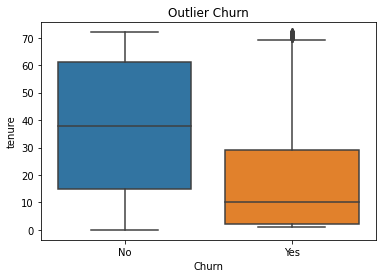

In [ ]:
ax = sns.boxplot(data=df, x='Churn', y='tenure')
ax.set_title('Outlier Churn')

plt.show()

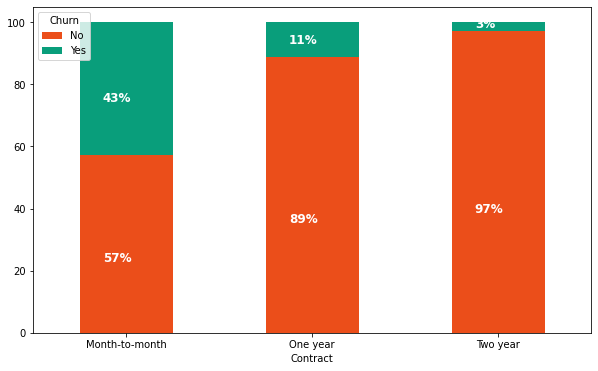

In [ ]:
colors = ['#EB4E1A','#099E7B']
churn_contract = df.groupby(['Contract','Churn']).size().unstack()
contract_chart = (churn_contract.T*100/churn_contract.T.sum()).T.plot(
    kind='bar',
    color=colors,
    stacked=True,
    figsize=(10,6),
    rot=0
)

contract_totals = []
for i in contract_chart.patches:
    width, height = i.get_width(), i.get_height()
    x,y = i.get_xy()
    contract_chart.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+0.4*height),
                            color='white',
                            size=12,
                            weight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


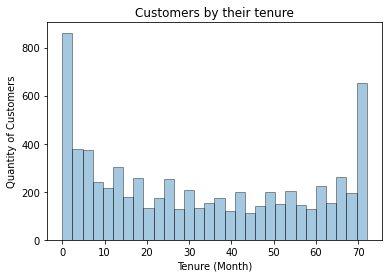

In [ ]:
customer_tenure = sns.distplot(df['tenure'], hist=True, 
                                kde=False,
                                hist_kws={'edgecolor':'black'},
                                bins=30);

customer_tenure.set_title('Customers by their tenure')
customer_tenure.set_ylabel('Quantity of Customers')
customer_tenure.set_xlabel('Tenure (Month)');


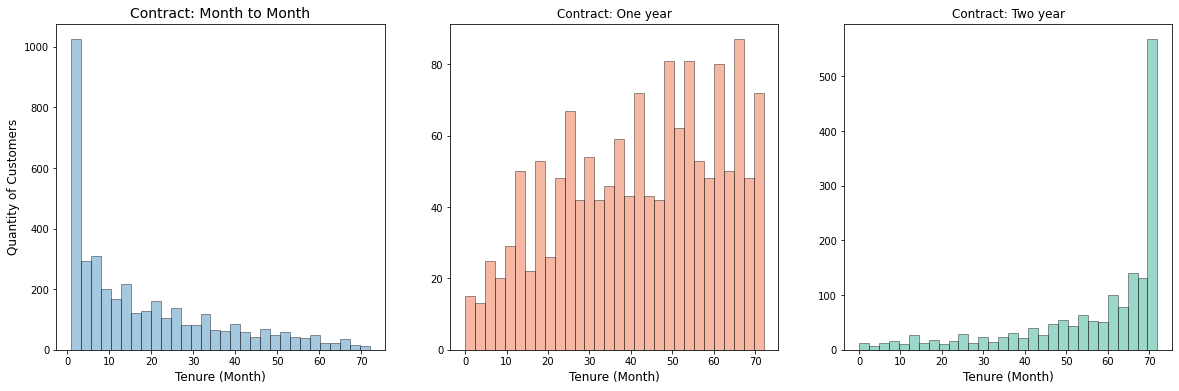

In [ ]:
fig, (ax1, ax2, ax3) =plt.subplots(ncols=3, figsize=(20,6));

ax = sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                  hist=True,
                  bins=30,
                  hist_kws={'edgecolor':'black'},
                  kde=False,
                  ax=ax1
                  );
ax1.set_title('Contract: Month to Month', size=14);
ax1.set_ylabel('Quantity of Customers', size=12);
ax1.set_xlabel('Tenure (Month)', size=12);

ax = sns.distplot(df[df['Contract'] == 'One year']['tenure'],
                     bins=30,
                     kde=False,
                     hist=True,
                     hist_kws = {'edgecolor':'black'},
                    color= '#EB4E1A',
                    ax=ax2);
ax2.set_title('Contract: One year');
ax2.set_xlabel('Tenure (Month)', size=12);

ax = sns.distplot(df[df['Contract'] == 'Two year']['tenure'],
                  bins=30,
                  kde=False,
                  hist=True,
                  hist_kws = {'edgecolor':'black'},
                  ax=ax3,
                  color='#099E7B');
ax3.set_title('Contract: Two year');
ax3.set_xlabel('Tenure (Month)', size=12);

display()

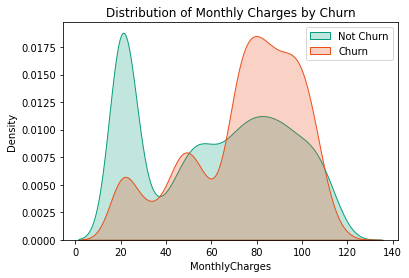

In [ ]:
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'No')],
                 color='#099E7B', shade=True)
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'Yes')],
                 color='#EB4E1A', shade=True)
ax.legend(['Not Churn','Churn']);
ax.set_title('Distribution of Monthly Charges by Churn');

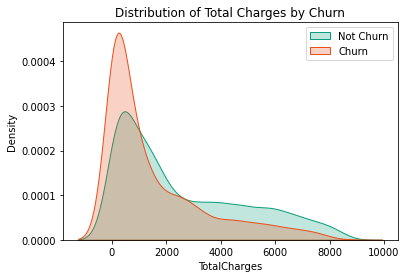

In [ ]:
ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'No')],
                 shade=True,
                 color='#099E7B')

ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'Yes')],
                 shade=True,
                 color='#EB4E1A')

ax.legend(['Not Churn','Churn']);
ax.set_title('Distribution of Total Charges by Churn');

### **Preprocessing**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['TotalCharges'].replace(np.nan,df['TotalCharges'].median(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_var = ['gender', 'Partner', 'Dependents', 
           'PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod','OnlineBackup','Churn']

for i in cat_var:
    df[i] = lb.fit_transform(df[i])

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

num_var = np.asarray(['tenure','MonthlyCharges','TotalCharges']).reshape(-1,1)

for i in num_var:
    df[i] = std_scale.fit_transform(df[i])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


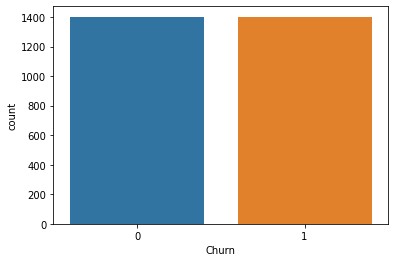

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

spl = RandomUnderSampler()
x_spl, y_spl = spl.fit_resample(X_train, y_train)

sns.countplot(y_spl)

plt.show()

In [ ]:
import pickle

with open('Churn.pkl', 'wb') as f:
    pickle.dump([x_spl, y_spl, X_test,y_test], f)

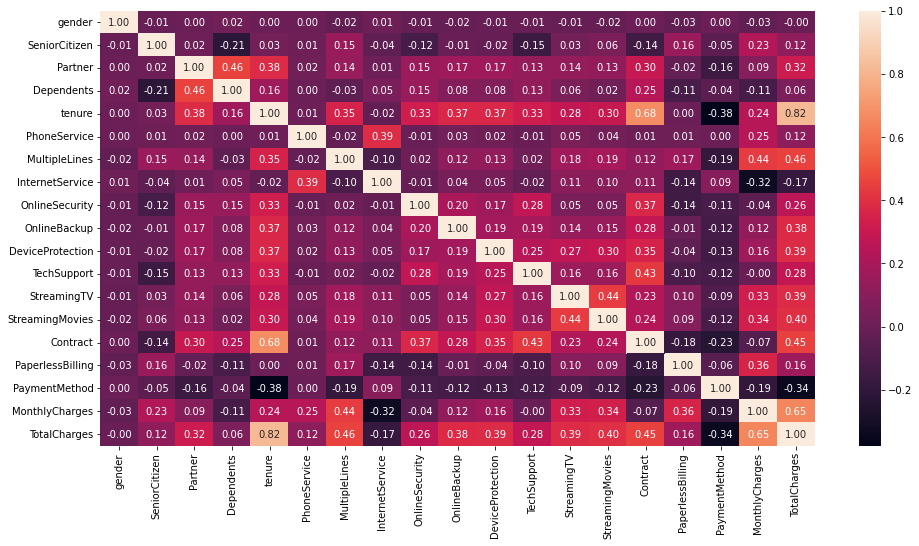

In [ ]:
corr = X_train.corr()
corr_spl = pd.DataFrame(x_spl).corr()

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=corr, square=False, annot=True, fmt='.2f');

### **Models Apply**

In [ ]:
with open('Churn.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

#### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#train the model
lg = LogisticRegression(random_state=1)
lg.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
#predict with train data
y_lg_pred = lg.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_lg_pred)

0.7353776263486655

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_tree_predict = tree.predict(x_test)
accuracy_score(y_test, y_tree_predict)

0.6757524134014764

#### **SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=1, kernel='rbf', C = 2.0)
svm.fit(x_train, y_train)

SVC(C=2.0, random_state=1)

In [ ]:
svm_predict = svm.predict(x_test)
accuracy_score(y_test, svm_predict)

0.7132311186825667

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomF = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=40)
randomF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
randomF_predict = randomF.predict(x_test)
accuracy_score(y_test, randomF_predict)

0.7223168654173765